### NAMA ANGGOTA KELOMPOK
1. MUHAMMAD ADE SULISTIANSYAH
2. MUHAMMAD AL-FAYYAD NEZZATI AL QASIM
3. MUHAMMAD ILHAM MAULANA

### Import library + set path file

In [ ]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from IPython.display import display
import matplotlib.pyplot as plt


path_excel = "resiko kredit (1).xlsx"

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)


### Baca data dari Excel (menggunakan openpyxl)

In [ ]:
workbook = load_workbook(path_excel, data_only=True)
sheet = workbook.active

data = []
for row in sheet.iter_rows(min_row=3, values_only=True):
    if row[0] is None:
        continue
    data.append({
        "id": int(row[0]),
        "gaji_juta": float(row[1]),
        "cicilan_persen": float(row[2]),
    })

df = pd.DataFrame(data).sort_values("id").reset_index(drop=True)

print("Jumlah data:", df.shape)
display(df)


Jumlah data: (50, 3)


,id,gaji_juta,cicilan_persen
0,1,3.7,54.0
1,2,6.2,48.0
2,3,2.9,58.0
3,4,9.5,44.0
4,5,4.1,52.0
5,6,11.0,37.0
6,7,5.3,46.0
7,8,7.8,41.0
8,9,3.1,56.0
9,10,12.4,32.0


### Fungsi keanggotaan (segitiga & trapesium)

In [ ]:
def trimf(x, a, b, c):
    if x <= a or x >= c:
        return 0.0
    if x == b:
        return 1.0
    if a < x < b:
        return (x - a) / (b - a) if (b - a) != 0 else 0.0
    return (c - x) / (c - b) if (c - b) != 0 else 0.0

def trapmf(x, a, b, c, d):
    if x < a or x > d:
        return 0.0
    if b <= x <= c:
        return 1.0
    if a == b and x <= b:
        return 1.0
    if c == d and x >= c:
        return 1.0
    if a < x < b:
        return (x - a) / (b - a) if (b - a) != 0 else 0.0
    if c < x < d:
        return (d - x) / (d - c) if (d - c) != 0 else 0.0
    return 0.0

def derajat_keanggotaan(x, parameter, nama):
    p = parameter[nama]
    if p[0] == "tri":
        _, a, b, c = p
        return trimf(x, a, b, c)
    _, a, b, c, d = p
    return trapmf(x, a, b, c, d)

print("Fungsi keanggotaan siap.")


Fungsi keanggotaan siap.


### Parameter linguistik (Gaji, Cicilan, Risiko) + aturan

In [ ]:
# Bentuk: ("tri", a, b, c) atau ("trap", a, b, c, d)
parameter_gaji = {
    "rendah": ("trap", 1.2, 1.2, 4.0, 8.0),
    "sedang": ("tri",  6.0, 11.0, 16.0),
    "tinggi": ("trap", 14.0, 20.0, 25.0, 25.0),
}

parameter_cicilan = {
    "kecil":  ("trap", 5.0, 5.0, 15.0, 30.0),
    "sedang": ("tri",  20.0, 37.0, 54.0),
    "besar":  ("trap", 45.0, 55.0, 62.0, 62.0),
}

parameter_risiko = {
    "rendah": ("trap", 0.0, 0.0, 20.0, 40.0),
    "sedang": ("tri",  30.0, 50.0, 70.0),
    "tinggi": ("trap", 60.0, 80.0, 100.0, 100.0),
}

# aturan: (cicilan, gaji) -> risiko
aturan = [
    ("kecil",  "tinggi", "rendah"),
    ("kecil",  "sedang", "rendah"),
    ("kecil",  "rendah", "sedang"),
    ("sedang", "tinggi", "sedang"),
    ("sedang", "sedang", "sedang"),
    ("sedang", "rendah", "tinggi"),
    ("besar",  "tinggi", "tinggi"),
    ("besar",  "sedang", "tinggi"),
    ("besar",  "rendah", "tinggi"),
]

print("Parameter & aturan siap. Jumlah aturan:", len(aturan))


Parameter & aturan siap. Jumlah aturan: 9


### Visual fungsi keanggotaan

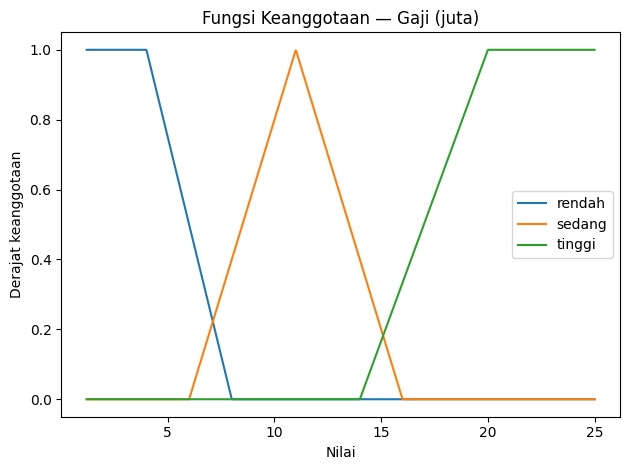

In [ ]:
def plot_fungsi_keanggotaan(parameter, semesta_min, semesta_max, judul):
    x = np.linspace(semesta_min, semesta_max, 1000)
    plt.figure()
    for nama in parameter.keys():
        y = [derajat_keanggotaan(v, parameter, nama) for v in x]
        plt.plot(x, y, label=nama)
    plt.title(judul)
    plt.xlabel("Nilai")
    plt.ylabel("Derajat keanggotaan")
    plt.ylim(-0.05, 1.05)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_fungsi_keanggotaan(parameter_gaji, 1.2, 25.0, "Fungsi Keanggotaan — Gaji (juta)")


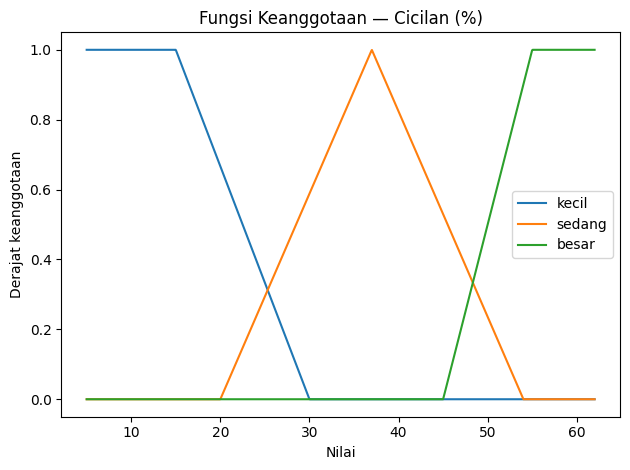

In [ ]:
plot_fungsi_keanggotaan(parameter_cicilan, 5.0, 62.0, "Fungsi Keanggotaan — Cicilan (%)")

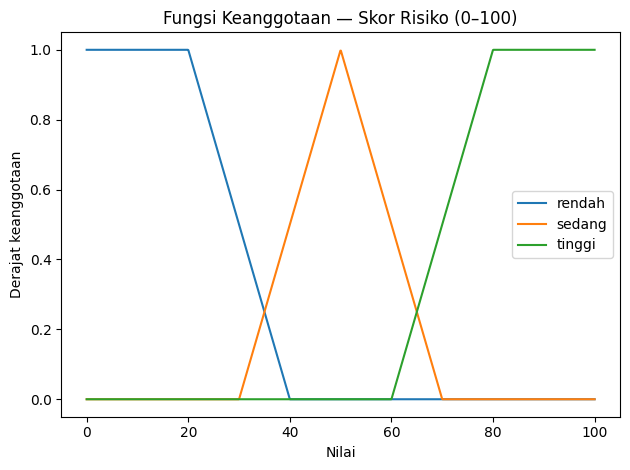

In [ ]:
plot_fungsi_keanggotaan(parameter_risiko, 0.0, 100.0, "Fungsi Keanggotaan — Skor Risiko (0–100)")


### FUZZIFIKASI (semua ID)

In [ ]:
term_gaji = list(parameter_gaji.keys())
term_cicilan = list(parameter_cicilan.keys())

df_fuzz = df.copy()

# fuzzifikasi gaji
for t in term_gaji:
    df_fuzz[f"mu_gaji_{t}"] = df_fuzz["gaji_juta"].apply(lambda x: derajat_keanggotaan(float(x), parameter_gaji, t))

# fuzzifikasi cicilan
for t in term_cicilan:
    df_fuzz[f"mu_cicilan_{t}"] = df_fuzz["cicilan_persen"].apply(lambda x: derajat_keanggotaan(float(x), parameter_cicilan, t))

print("Output FUZZIFIKASI (semua ID):")
display(df_fuzz)


Output FUZZIFIKASI (semua ID):


,id,gaji_juta,cicilan_persen,mu_gaji_rendah,mu_gaji_sedang,mu_gaji_tinggi,mu_cicilan_kecil,mu_cicilan_sedang,mu_cicilan_besar
0,1,3.7,54.0,1.000,0.00,0.000000,0.000000,0.000000,0.9
1,2,6.2,48.0,0.450,0.04,0.000000,0.000000,0.352941,0.3
2,3,2.9,58.0,1.000,0.00,0.000000,0.000000,0.000000,1.0
3,4,9.5,44.0,0.000,0.70,0.000000,0.000000,0.588235,0.0
4,5,4.1,52.0,0.975,0.00,0.000000,0.000000,0.117647,0.7
5,6,11.0,37.0,0.000,1.00,0.000000,0.000000,1.000000,0.0
6,7,5.3,46.0,0.675,0.00,0.000000,0.000000,0.470588,0.1
7,8,7.8,41.0,0.050,0.36,0.000000,0.000000,0.764706,0.0
8,9,3.1,56.0,1.000,0.00,0.000000,0.000000,0.000000,1.0
9,10,12.4,32.0,0.000,0.72,0.000000,0.000000,0.705882,0.0


## Metode Mamdani

### AKTIVASI ATURAN (alpha semua ID)

In [ ]:
data_aktivasi = []

for _, r in df_fuzz.iterrows():
    id_ = int(r["id"])
    for no_aturan, (cic_term, gaji_term, risiko_term) in enumerate(aturan, start=1):
        mu_c = float(r[f"mu_cicilan_{cic_term}"])
        mu_g = float(r[f"mu_gaji_{gaji_term}"])
        alpha = min(mu_c, mu_g)
        data_aktivasi.append({
            "id": id_,
            "aturan_ke": no_aturan,
            "cicilan": cic_term,
            "gaji": gaji_term,
            "risiko": risiko_term,
            "mu_cicilan": round(mu_c, 6),
            "mu_gaji": round(mu_g, 6),
            "alpha": round(alpha, 6),
        })

df_aktivasi_all = pd.DataFrame(data_aktivasi).sort_values(["id", "aturan_ke"]).reset_index(drop=True)

print("Output AKTIVASI ATURAN (semua ID):")
display(df_aktivasi_all)


Output AKTIVASI ATURAN (semua ID):


,id,aturan_ke,cicilan,gaji,risiko,mu_cicilan,mu_gaji,alpha
0,1,1,kecil,tinggi,rendah,0.000000,0.00,0.00
1,1,2,kecil,sedang,rendah,0.000000,0.00,0.00
2,1,3,kecil,rendah,sedang,0.000000,1.00,0.00
3,1,4,sedang,tinggi,sedang,0.000000,0.00,0.00
4,1,5,sedang,sedang,sedang,0.000000,0.00,0.00
...,...,...,...,...,...,...,...,...
445,50,5,sedang,sedang,sedang,0.882353,0.62,0.62
446,50,6,sedang,rendah,tinggi,0.882353,0.00,0.00
447,50,7,besar,tinggi,tinggi,0.000000,0.00,0.00
448,50,8,besar,sedang,tinggi,0.000000,0.62,0.00


### CLIPPING

In [ ]:
step_z = 5
semesta_z = np.arange(0, 101, step_z)

# Precompute mu konsekuen untuk tiap term risiko di semua z
mu_konsekuen_risiko = {}
for term in parameter_risiko.keys():
    mu_konsekuen_risiko[term] = np.array([derajat_keanggotaan(z, parameter_risiko, term) for z in semesta_z], dtype=float)

baris_clipping = []

for _, row in df_aktivasi_all.iterrows():
    alpha = float(row["alpha"])
    if alpha <= 0:
        continue  # alpha 0 -> clipping 0 semua, boleh skip

    id_ = int(row["id"])
    aturan_ke = int(row["aturan_ke"])
    risiko_term = row["risiko"]

    mu_k = mu_konsekuen_risiko[risiko_term]
    mu_terklip = np.minimum(mu_k, alpha)  # clipping

    for z, mu_kz, mu_tz in zip(semesta_z, mu_k, mu_terklip):
        baris_clipping.append({
            "id": id_,
            "aturan_ke": aturan_ke,
            "cicilan": row["cicilan"],
            "gaji": row["gaji"],
            "risiko": risiko_term,
            "z": int(z),
            "mu_konsekuen(z)": round(float(mu_kz), 6),
            "alpha": round(alpha, 6),
            "mu_terklip(z)": round(float(mu_tz), 6),
        })

df_clipping_all = pd.DataFrame(baris_clipping).sort_values(["id", "aturan_ke", "z"]).reset_index(drop=True)

pd.set_option("display.max_rows", None)  # tampilkan seluruh baris
print("Jumlah baris CLIPPING:", len(df_clipping_all))
display(df_clipping_all)


Jumlah baris CLIPPING: 1596


,id,aturan_ke,cicilan,gaji,risiko,z,mu_konsekuen(z),alpha,mu_terklip(z)
0,1,9,besar,rendah,tinggi,0,0.00,0.900000,0.000000
1,1,9,besar,rendah,tinggi,5,0.00,0.900000,0.000000
2,1,9,besar,rendah,tinggi,10,0.00,0.900000,0.000000
3,1,9,besar,rendah,tinggi,15,0.00,0.900000,0.000000
4,1,9,besar,rendah,tinggi,20,0.00,0.900000,0.000000
5,1,9,besar,rendah,tinggi,25,0.00,0.900000,0.000000
6,1,9,besar,rendah,tinggi,30,0.00,0.900000,0.000000
7,1,9,besar,rendah,tinggi,35,0.00,0.900000,0.000000
8,1,9,besar,rendah,tinggi,40,0.00,0.900000,0.000000
9,1,9,besar,rendah,tinggi,45,0.00,0.900000,0.000000


### AGREGASI (MAX)

In [ ]:
df_agregasi = (
    df_clipping_all
    .groupby(["id", "z"], as_index=False)["mu_terklip(z)"]
    .max()
    .rename(columns={"mu_terklip(z)": "mu_agregasi(z)"})
    .sort_values(["id", "z"])
    .reset_index(drop=True)
)

print("Output AGREGASI (semua ID):")
display(df_agregasi)


Output AGREGASI (semua ID):


,id,z,mu_agregasi(z)
0,1,0,0.000000
1,1,5,0.000000
2,1,10,0.000000
3,1,15,0.000000
4,1,20,0.000000
5,1,25,0.000000
6,1,30,0.000000
7,1,35,0.000000
8,1,40,0.000000
9,1,45,0.000000


### DEFUZZIFIKASI (Centroid)

In [ ]:
def centroid_diskrit(grup_agregasi):
    z = grup_agregasi["z"].to_numpy(dtype=float)
    mu = grup_agregasi["mu_agregasi(z)"].to_numpy(dtype=float)
    if mu.sum() == 0:
        return 50.0
    return float((z * mu).sum() / mu.sum())

data_skor = []
for id_, grup in df_agregasi.groupby("id"):
    skor = centroid_diskrit(grup)
    data_skor.append({"id": int(id_), "skor_risiko": round(skor, 6)})

df_skor = pd.DataFrame(data_skor).sort_values("id").reset_index(drop=True)

print("Output SKOR (semua ID):")
display(df_skor)


Output SKOR (semua ID):


,id,skor_risiko
0,1,85.416667
1,2,80.271208
2,3,85.769231
3,4,50.000000
4,5,84.595960
5,6,50.000000
6,7,83.589211
7,8,54.622642
8,9,85.769231
9,10,50.000000


### Gabungkan skor + tampilkan TOP 10 risiko terkecil

In [ ]:
df_hasil = df.merge(df_skor, on="id", how="left")

df_top10 = (
    df_hasil
    .sort_values(["skor_risiko", "id"], ascending=[True, True])
    .head(10)
    .reset_index(drop=True)
)

print("TOP 10 risiko kredit terkecil:")
display(df_top10)


TOP 10 risiko kredit terkecil:


,id,gaji_juta,cicilan_persen,skor_risiko
0,27,20.1,15.0,14.230769
1,29,21.7,11.0,14.230769
2,31,22.4,9.0,14.230769
3,33,23.6,8.0,14.230769
4,34,24.9,7.0,14.230769
5,35,25.0,5.0,14.230769
6,25,19.5,18.0,15.000000
7,23,18.2,20.0,15.526315
8,45,18.1,21.0,18.558494
9,40,17.6,22.0,21.651928


## METODE SUGENO ORDE-0

### Set nilai output konstanta (orde-0)

In [ ]:
konstanta_risiko = {
    "rendah": 25,
    "sedang": 50,
    "tinggi": 80
}

konstanta_risiko


{'rendah': 25, 'sedang': 50, 'tinggi': 80}

### Hitung skor Sugeno untuk semua ID

In [ ]:
df_sugeno = df_aktivasi_all.copy()

# z_i untuk setiap aturan (berdasarkan THEN risiko)
df_sugeno["z_konstan"] = df_sugeno["risiko"].map(konstanta_risiko)

# kontribusi aturan = alpha * z_i
df_sugeno["alpha_x_z"] = df_sugeno["alpha"] * df_sugeno["z_konstan"]

# agregasi per ID: z = sum(alpha*z) / sum(alpha)
df_skor_sugeno = (
    df_sugeno.groupby("id", as_index=False)
    .agg(jumlah_alpha=("alpha", "sum"),
         jumlah_alpha_x_z=("alpha_x_z", "sum"))
)

df_skor_sugeno["skor_risiko_sugeno"] = df_skor_sugeno.apply(
    lambda r: 50.0 if r["jumlah_alpha"] == 0 else r["jumlah_alpha_x_z"] / r["jumlah_alpha"],
    axis=1
)

df_skor_sugeno = df_skor_sugeno[["id", "skor_risiko_sugeno"]].sort_values("id").reset_index(drop=True)

print("Output skor Sugeno (semua ID):")
display(df_skor_sugeno)


Output skor Sugeno (semua ID):


,id,skor_risiko_sugeno
0,1,80.000000
1,2,78.362760
2,3,80.000000
3,4,50.000000
4,5,80.000000
5,6,50.000000
6,7,80.000000
7,8,53.658537
8,9,80.000000
9,10,50.000000


## Tampilkan TOP 10 skor risiko terkecil

In [ ]:
df_hasil_sugeno = df.merge(df_skor_sugeno, on="id", how="left")

df_top10_sugeno = (
    df_hasil_sugeno
    .sort_values(["skor_risiko_sugeno", "id"], ascending=[True, True])
    .head(10)
    .reset_index(drop=True)
)

print("TOP 10 risiko terkecil — Metode Sugeno orde-0:")
display(df_top10_sugeno)


TOP 10 risiko terkecil — Metode Sugeno orde-0:


,id,gaji_juta,cicilan_persen,skor_risiko_sugeno
0,25,19.5,18.0,25.000000
1,27,20.1,15.0,25.000000
2,29,21.7,11.0,25.000000
3,31,22.4,9.0,25.000000
4,33,23.6,8.0,25.000000
5,34,24.9,7.0,25.000000
6,35,25.0,5.0,25.000000
7,23,18.2,20.0,25.000000
8,45,18.1,21.0,27.232159
9,40,17.6,22.0,29.518073


In [ ]:
with pd.ExcelWriter("peringkat.xlsx") as writer:
    df_top10.to_excel(writer, index=False, sheet_name="Mamdani_Top10")
    df_top10_sugeno.to_excel(writer, index=False, sheet_name="Sugeno_Top10")
print("File peringkat.xlsx berhasil dibuat (Mamdani & Sugeno).")
